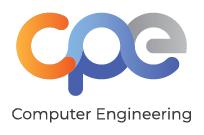

# CPE111/ISY202
# Session10: Trees
## Topic

* Binary Trees and Binary Trees Implementation
* Tree Traversal
    * Depth-First Search
        * pre-order
        * in-order
        * post-order
    * Breadth-First Search
    
    
* Heap
* Binary Search Tree

---

## Binary Trees and Binary Trees Implementation

__A binary tree__ is a data structure in which every node or vertex has at most two children. <br>
__A binary tree__ can be represented in various ways e.g; with some data structures and class representations for a node.

In [2]:
# Example code: Simple Binary Tree Class implementation
class BinaryTree:
   def __init__(self,Rootobj):
      self.key = Rootobj
      self.leftChild = None
      self.rightChild = None
      
   def insertLeft(self,newNode):
      if self.leftChild == None:
         self.leftChild = BinaryTree(newNode)
      else:
         t = BinaryTree(newNode)
         t.leftChild = self.leftChild
         self.leftChild = t
   
   def insertRight(self,newNode):
      if self.rightChild == None:
         self.rightChild = BinaryTree(newNode)
      else:
         t = BinaryTree(newNode)
         t.rightChild = self.rightChild
         self.rightChild = t

# Print the tree
   def PrintTree(self):
      print(self.key)

      if self.leftChild:
         print("/")
         self.leftChild.PrintTree()
      
      if self.rightChild:
         print("\\")
         self.rightChild.PrintTree()


root = BinaryTree(10)
root.insertLeft(12)
root.insertLeft(3)
root.insertRight(4)
root.PrintTree()

10
/
3
/
12
\
4


### BinaryTree Module

### Binarytree: Python Library for Studying Binary Trees
Binarytree is Python library which lets you generate, visualize, inspect and manipulate __binary trees__. Skip the tedious work of setting up test data, and dive straight into practising algorithms. __Heaps__ and __binary search trees__ are also supported. Self-balancing search trees like red-black or AVL will be added in the future.

https://binarytree.readthedocs.io/en/main/#


In [3]:
# Install binary tree module
#!pip install binarytree 

| Class | Description | Examples |
| --- | --- | --- |
| binarytree.Node | Represents a binary tree node | binarytree.Node(3)

In [4]:
from binarytree import Node 
root = Node(10) # ตามด้วยข้อมูลของมัน
root.left = Node(3) 
root.right = Node(4)
root.left.left = Node(12)
  
# Getting binary tree 
print('Binary tree :', root) 
  
# Getting list of nodes 
print('List of nodes :', list(root)) 
  
# Getting inorder of nodes 
print('Inorder of nodes :', root.inorder) 
  
# Checking tree properties 
print('Size of tree :', root.size) 
print('Height of tree :', root.height) 
  
# Get all properties at once 
print('Properties of tree : \n', root.properties) 


Binary tree : 
     10
    /  \
  _3    4
 /
12

List of nodes : [Node(10), Node(3), Node(4), Node(12)]
Inorder of nodes : [Node(12), Node(3), Node(10), Node(4)]
Size of tree : 4
Height of tree : 2
Properties of tree : 
 {'height': 2, 'size': 4, 'is_max_heap': False, 'is_min_heap': False, 'is_perfect': False, 'is_strict': False, 'is_complete': True, 'leaf_count': 2, 'min_node_value': 3, 'max_node_value': 12, 'min_leaf_depth': 1, 'max_leaf_depth': 2, 'is_balanced': True, 'is_bst': False, 'is_symmetric': False}


---

Value can be int, float, or str

In [5]:
from binarytree import Node
myTree = Node("A")
myTree.left = Node("B")
myTree.right = Node("C")
myTree.left.left = Node("D")
myTree.left.right = Node("E")
myTree.right.left = Node("F")
myTree.right.right = Node("G")

print(myTree)


    __A__
   /     \
  B       C
 / \     / \
D   E   F   G



`Practice#1` Try to create this binary tree  <br>
<br>
<img src="BinaryTree.png" alt="BinaryTree" width="400"/>

In [6]:
from binarytree import Node

root = Node("A")
root.left = Node("B")
root.left.left = Node("D")
root.left.right = Node("E")
root.left.right.left = Node("H")
root.right = Node("C")
root.right.left = Node("F")
root.right.right = Node("G")
root.right.right.left = Node("I")
root.right.right.right = Node("J")

print(root)


    ____A__
   /       \
  B__       C__
 /   \     /   \
D     E   F     G
     /         / \
    H         I   J



---

### Delete Node, Get Node, Set Value

In [7]:
from binarytree import Node

root = Node(1)          # index: 0, value: 1
root.left = Node(2)     # index: 1, value: 2
root.right = Node(3)    # index: 2, value: 3

print(root)

# delete Node3 with index:2
del root[2]
print(root)



  1
 / \
2   3


  1
 /
2



### Each node can be a sub tree

In [12]:
from binarytree import Node

root = Node(1)       # index: 0, value: 1
root.left = Node(2)  # index: 1, value: 2
root.right = Node(3) # index: 2, value: 3
root.left.left = Node(4) # index: 3, value: 4
root.left.right = Node(5) # index: 4, value: 5
root.right.left = Node(6) # index: 5, value: 6
root.right.right = Node(7)# index: 6, value: 7

print(root[0])
print(root[1]) # left child - Sub Tree of root 
print(root[2]) # right child - Sub Tree of root 


    __1__
   /     \
  2       3
 / \     / \
4   5   6   7


  2
 / \
4   5


  3
 / \
6   7



In [13]:
from binarytree import Node

root = Node(1)
root.left = Node(2)
root.left.left = Node(3)
root.left.left.left = Node(4)
root.left.left.right = Node(5)


In [14]:
print(root)
print(list(root))
print(root.values) # ตัวไหนควรเป็น None เขาจะให้ออกมาหมดเลย
print(root.values2) # ส่วนที่มันเป็น Value ที่ None 2 ตัวติด มันจะไม่ได้ปริ้นออกมา


        1
       /
    __2
   /
  3
 / \
4   5

[Node(1), Node(2), Node(3), Node(4), Node(5)]
[1, 2, None, 3, None, None, None, 4, 5]
[1, 2, None, 3, None, 4, 5]


### Insert a node (or subtree) at the given level-order index.

* An exception is raised if the parent node is missing.
* Any existing node or subtree is overwritten.
* Root node (current node) cannot be replaced.

In [15]:
root.left.left = Node(6) # ใส่ sub-tree เข้าไปใหม่ หายทั้งยวง
print(root)


    1
   /
  2
 /
6



In [16]:
subtree = Node("K")
subtree.left = Node("M")
subtree.right = Node("U")
subtree.left.left = Node("T")
subtree.right.right = Node("T")
print(subtree)



    K
   / \
  M   U
 /     \
T       T



In [17]:
root.right = subtree
print(root)


    1____
   /     \
  2       K
 /       / \
6       M   U
       /     \
      T       T



---

## Tree Traversal <br>
Refer to a linked list, the traversal is simple because we can start with the first node and follow the links through the next nodes, that there is only one next node. But for Tree, there is no single path from the root to every other node.


__Depth-First Search__ <br>
* Pre-order Traversal <br>
    _root -> left -> right_ <br>
* In-order Traversal <br>
    _left -> root -> right_ <br>
* Post-order Traversal<br>
    _left -> right -> root_ <br>

<br>

__Breadth-First Search__ <br>
    _root -> left -> right_ (by level)

<br>
<img src="BinaryTree.png" alt="BinaryTree" width="400"/>

Pre-order: [ A B D E H C F G I J ]  <br>
In-order:  [ D B H E A F C I G J ]  <br>
Post-order:[ D H E B F I J G C A ]  <br>
Breadth-order: [ A B C D E F G H I J ]

In [18]:
# Example Code: Tree Traversal with preorder, postorder, inorder methods
from binarytree import Node

root = Node(1)
root.left = Node(2)
root.right = Node(3)
root.left.left = Node(4)
root.left.right = Node(5)

print(root)
print("Pre-order :",root.preorder)
print("Post-order :",root.postorder)
print("In-order :",root.inorder)
print("Breadth-order:", root.levelorder)


    __1
   /   \
  2     3
 / \
4   5

Pre-order : [Node(1), Node(2), Node(4), Node(5), Node(3)]
Post-order : [Node(4), Node(5), Node(2), Node(3), Node(1)]
In-order : [Node(4), Node(2), Node(5), Node(1), Node(3)]
Breadth-order: [Node(1), Node(2), Node(3), Node(4), Node(5)]


---

`Prectice#2` Tree Traveral for the binary tree from __Practice#1__

<br>
<img src="BinaryTree.png" alt="BinaryTree" width="400"/>

In [19]:
from binarytree import Node

root = Node("A")
root.left = Node("B")
root.left.left = Node("D")
root.left.right = Node("E")
root.left.right.left = Node("H")
root.right = Node("C")
root.right.left = Node("F")
root.right.right = Node("G")
root.right.right.left = Node("I")
root.right.right.right = Node("J")

print(root)


    ____A__
   /       \
  B__       C__
 /   \     /   \
D     E   F     G
     /         / \
    H         I   J



In [24]:
print("Pre-order :",root.preorder)
print("Post-order :",root.postorder)
print("In-order :",root.inorder)
print("Breadth-order:", root.levelorder)

Pre-order : [Node(A), Node(B), Node(D), Node(E), Node(H), Node(C), Node(F), Node(G), Node(I), Node(J)]
Post-order : [Node(D), Node(H), Node(E), Node(B), Node(F), Node(I), Node(J), Node(G), Node(C), Node(A)]
In-order : [Node(D), Node(B), Node(H), Node(E), Node(A), Node(F), Node(C), Node(I), Node(G), Node(J)]
Breadth-order: [Node(A), Node(B), Node(C), Node(D), Node(E), Node(F), Node(G), Node(H), Node(I), Node(J)]


---

### Build tree from list

| Function | Description | Example |
| --- | --- | --- |
|binarytree.build | Build a tree from list representation and return its root node |  root = build([1, 2, 3, None, 4]) | <br>

Parameters:
* __values ([float, int, str, None])__ – List representation of the binary tree, which is a list of node values in breadth-first order starting from the root (current node). <br> 
* If a node is at index i, its left child is always at 2i + 1, right child at 2i + 2, and parent at floor((i - 1) / 2).<br> 
* “None” indicates absence of a node at that index.

In [25]:
from binarytree import build

root = build([1, 2, 3, None, 4, None, None, None, None, 5])
print(root)


  ____1
 /     \
2__     3
   \
    4
   /
  5



| Function | Description | Example |
| --- | --- | --- |
|binarytree.build2 | Build a tree from list representation and return its root node |  root = build2([1, 2, 3, None, 4]) | <br>

<br>
Parameters: <br>
* __values ([float, int, str, None])__ – List representation of the binary tree, like __binarytree.build()__ but with a slightly different representation which associates two adjacent child values with the first parent value that has not been associated yet. <br> 
* This representation __does not__ provide the same indexing properties where if a node is at index i, its left child is always at 2i + 1, right child at 2i + 2, and parent at floor((i - 1) / 2), but it allows for more compact lists as it does not hold “None”s between nodes in each level

In [26]:
from binarytree import build2

root = build2([2, 5, None, 3, None, 1, 4])
print(root)


        2
       /
    __5
   /
  3
 / \
1   4



---

## Examples of various binary trees

### A random Binary Tree
* A binary tree is a tree in which each node can have at most two children.
* One child is identified as the left child and the other as the right child

| Function | Description | Example |
| --- | --- | --- |
|binarytree.tree | Generate a random binary tree and return its root node |  root = tree() |

<br>
<br>
Parameters: <br>

* __height (int)__ – Height of the tree (default: 3, range: 0 - 9 inclusive). <br>
* __is_perfect (bool)__ – If set to True (default: False), a perfect binary tree with all levels filled is returned. If set to False, a perfect binary tree may still be generated by chance. <br>
* __letters (bool)__ – If set to True (default: False), uppercase alphabet letters are used for node values instead of numbers.

In [27]:
from binarytree import tree

root = tree(height=5, is_perfect=True)

print(root)
print(root.height)
print(root.is_perfect)



                                            ____________________________________________36________________________________________
                                           /                                                                                      \
                      ____________________2____________________                                                  __________________26_____________________
                     /                                         \                                                /                                         \
           _________49________                        __________12_________                           _________0________                         __________28_________
          /                   \                      /                     \                         /                  \                       /                     \
     ____55__              ____31___             ___38___               ____32___         

In [28]:
from binarytree import tree

root = tree(height=3, letters=True)

print(root)
print(root.height)


      ____J__
     /       \
    C__       H__
   /   \     /   \
  F     D   G     E
 /     /         /
I     O         M

3


---

### A Max/Min Heap
A Heap is a complete binary tree in which the nodes are organized based on their data entry values.


Heap is a tree data structure that can be of two types:

* __max heap__ <br>
    A Max-heap has the property, known as the heap order property, that for each non-leaf node V , the value in V is greater than the value of its two children.
    The largest value in a max-heap will always be stored in the root while the smallest values will be stored in the leaf nodes. 

* __min heap__ <br>
    A Min-heap has the opposite property. For each non-leaf node V , the value in V is smaller than the value of its two children.

<br>
<img src="min_max_heap.png" alt="Heap" width="800"/>

| Function | Description | Example |
| --- | --- | --- |
|binarytree.heap | Generate a random heap and return its root node. |  root = heap(3, is_max = False) |

<br>
<br>
Parameters: <br>

* __height (int)__ – Height of the heap (default: 3, range: 0 - 9 inclusive).
* __is_max (bool)__ – If set to True (default: True), generate a max heap. If set to False, generate a min heap. A binary tree with only the root node is considered both a min and max heap.
* __is_perfect (bool)__ – If set to True (default: False), a perfect heap with all levels filled is returned. If set to False, a perfect heap may still be generated by chance.
* __letters (bool)__ – If set to True (default: False), uppercase alphabet letters are used for node values instead of number

In [29]:
from binarytree import heap

root = heap()

print(root)
print(root.height)
print(root.is_max_heap)


        ______14________
       /                \
    __8__            ____13
   /     \          /      \
  7       6        12       4
 / \     / \      /  \
5   2   0   3    9    11

3
True


In [31]:
from binarytree import heap

root = heap(4, is_max=False)

print(root)
print(root.height)
print(root.is_min_heap)


                      _________2________
                     /                  \
           _________4___              ___3___
          /             \            /       \
     ____6___           _16        _9        _7
    /        \         /   \      /  \      /  \
  _13        _14      20    19   10   25   24   28
 /   \      /   \
23    15   27    17

4
True


In [32]:
from binarytree import heap

root = heap(5, is_max=False, is_perfect=True)

print(root)
print(root.height)
print(root.is_min_heap)
print(root.is_perfect)


                                            ___________________________________________0____________________________________________
                                           /                                                                                        \
                       ___________________1_____________________                                                _____________________4_____________________
                      /                                         \                                              /                                           \
           __________2_________                        __________3_________                         __________5_________                          __________9_________
          /                    \                      /                    \                       /                    \                        /                    \
     ____17___              ____6___             ____15___              ____8___    

---

### A Binary Search Tree (BST)
The binary search tree is a special type of tree data structure whose inorder gives a sorted list of nodes or vertices. <br>
<br>
A binary tree that each interior node V has: <br>

* left subtree of V : All keys less than the key in node V
* right subtree of V : All keys greater than the key in node V


<br>
<img src="bst.png" alt="BinarySearchTree" width="300"/>

<br>
<br>

| Function | Description | Example |
| --- | --- | --- |
|binarytree.bst | Generate a random BST (binary search tree) and return its root node.|  root = bst(3, is_perfect = True) |

<br>
<br>
Parameters: <br>
	
* __height (int)__ – Height of the BST (default: 3, range: 0 - 9 inclusive).
* __is_perfect (bool)__ – If set to True (default: False), a perfect BST with all levels filled is returned. If set to False, a perfect BST may still be generated by chance.
* __letters (bool)__ – If set to True (default: False), uppercase alphabet letters are used for node values instead of numbers

In [ ]:
from binarytree import bst

root = bst(5)

print(root)
print(root.height)
print(root.is_bst)

---

`Practice#3` Summary
* What are different between __heap__ and __bst__ ?
* What are the applications of __heap__ ?
* What are the applications of __bst__ ?

### ความแตกต่างระหว่าง Heap และ BST
- Heap คือ Complete Binary Tree แบ่งเป็น 2 ประเภท ได้แก่ Max Heap และ Min Heap
1. Max Heap เป็น Tree ที่มีกฎคือ Node พ่อแม่ จะต้องมีค่ามากกว่า Node ลูกเสมอ ดังนั้น Node ราก จะมีค่าสูงสุดเสมอ
2. Min Heap ตรงกันข้ามกับ Max Heap คือ Node พ่อแม่ต้องมีค่าน้อยกว่า Node ลูกเสมอ ดังนั้น Node รากจะมีค่าต่ำสุดเสมอเช่นกัน

- Binary Search Tree (BST) คือ Binary Tree ที่มีกฎคือ Node ลูกซ้าย จะมีค่าน้อยกว่า Node พ่อแม่ และ Node ลูกขวา จะมีค่ามากกว่า Node พ่อแม่ 

### การประยุกต์ใช้ Heap
- การประยุกต์ใช้ Heap จะเอาไปไว้ใช้หาค่าสูงสุดและต่ำสุดในชุดข้อมูล เพราะ Max Heap จะมีโหนดรากเป็นค่าสูงสุด และ Min Heap จะมีโหนดรากเป็นค่าต่ำสุด
- ถึงแม้ว่าเราจะ Extract โหนดรากออกไป Heap ก็ยังมีกลไกที่จะทำให้โหนดรากมีค่าสูงสุดต่ำสุดอยู่เสมอ

### การประยุกต์ใช้ BST
- ยกตัวอย่าง กรณีที่เราต้องการเก็บข้อมูลแบบความสัมพันธ์ที่แตกต่างออกไปจากแบบลำดับ เช่น แผนผังครอบครัว,หรือประยุกต์ใช้ในการ Search ข้อมูล เพราะการค้นหาข้อมูล Linear ที่ต้อง Brute Force Index ซึ่งมี Time Complexity = O(n) เราสามารถ Sort ก่อนแล้วจึงเช็ค ว่าถ้าเกินแล้วไม่มีก็สามารถ Terminate ก่อนได้ แต่กระบวนการ Sort แล้วค่อย Search ที่ดีที่สุดก็ยังมี Time Complexity ประมาณ O(nlogn)
- ถ้าหากเราใช้ Tree Data Structure เพื่อ Search อย่างเช่น BST เราจะสามารถหาข้อมูลโดยใช้เวลาเพียง O(logn) เพราะสามารถ Terminate ออกได้ถ้าไม่เจอ

---

<div style="color:greenyellow;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>